## Customer Churn Dataset
### Domain - Telecommunication
#### Dataset - Click here to download the dataset:
   https://drive.google.com/file/d/1Wp2ioU0gHFyFEA2NJ10-IjzmMCsUbWEe/view?usp=sharing

#### The data set includes information about :
* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security,     online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless   billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents
  
### Business Understanding :
* The telecommunications sector has become one of the main industries in developed countries. The       technical progress and the increasing number of operators raised the level of competition. Companies   are working hard to survive in this competitive market depending on multiple strategies. Three main   strategies have been proposed to generate more revenues:

   * Acquire new customers
   * Upsell the existing customers
   * Increase the retention period of customers However, comparing these strategies taking the value        of return on investment (RoI) of each into account has shown that the third strategy is the most      profitable strategy, proving that retaining an existing customer costs much lower than acquiring      a new one, in addition to being considered much easier than the upselling strategy. To apply the      third strategy, companies have to decrease the potential of customer’s churn, known as "the            customer movement from one provider to another".

* Customer churn is a considerable concern in service sectors with high competitive services. On the     other hand, predicting the customers who are likely to leave the company will represent a             potentially large additional revenue source if it is done in the early phase.

* Many research confirmed that machine learning technology is highly efficient to predict this           situation. This technique is applied through learning from previous data.

* Customer Churn is one of the most important and challenging problems for businesses such as Credit     Card companies, cable service providers, SASS and telecommunication companies worldwide. Even though   it is not the most fun to look at, customer churn metrics can help businesses improve customer         retention.

#### Problem Statement :
* Given various features about a customer like Gender, SeniorCitizen, Partner, Dependents etc.. , predict if the customer will churn or not.

#### Task - Prepare the Data and build a model to predict the churn of a customer.

In [1]:
import numpy as np
import pandas as pd

##### Load the Dataset

In [2]:
df=pd.read_csv(r'churn_dataset.csv')
df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)

In [8]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df.drop(['customerID'],inplace=True,axis=1)

In [11]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


#### K-NN Imputer

In [12]:
sep = '-'
df_1 = pd.get_dummies(df,prefix_sep=sep)
df_1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender-Female,gender-Male,Partner-No,Partner-Yes,Dependents-No,Dependents-Yes,...,Contract-One year,Contract-Two year,PaperlessBilling-No,PaperlessBilling-Yes,PaymentMethod-Bank transfer (automatic),PaymentMethod-Credit card (automatic),PaymentMethod-Electronic check,PaymentMethod-Mailed check,Churn-No,Churn-Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,0,1,0,0,0,1,1,0
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1


In [13]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_3 = pd.DataFrame(imputer.fit_transform(df_1),columns=df_1.columns)

In [14]:
df_3

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender-Female,gender-Male,Partner-No,Partner-Yes,Dependents-No,Dependents-Yes,...,Contract-One year,Contract-Two year,PaperlessBilling-No,PaperlessBilling-Yes,PaymentMethod-Bank transfer (automatic),PaymentMethod-Credit card (automatic),PaymentMethod-Electronic check,PaymentMethod-Mailed check,Churn-No,Churn-Yes
0,0.0,1.0,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,34.0,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,2.0,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,45.0,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,2.0,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,24.0,84.80,1990.50,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
7039,0.0,72.0,103.20,7362.90,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7040,0.0,11.0,29.60,346.45,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7041,1.0,4.0,74.40,306.60,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [15]:
df_3['TotalCharges'].isnull().sum()

0

In [16]:
dfs = []
    
dummy_cols = list(set(col.split(sep)[0] for col in df_3.columns if sep in col))
other_cols = [col for col in df_3.columns if sep not in col]

for col in dummy_cols:
    dfs.append(df_3.filter(regex=col).rename(columns=lambda name: name.split(sep)[1]).idxmax(axis=1))

df_4 = pd.concat(dfs + [df_3[other_cols]], axis=1)
df_4.columns = dummy_cols + other_cols 
df_4

,DeviceProtection,OnlineBackup,Contract,OnlineSecurity,Dependents,gender,Churn,Partner,TechSupport,InternetService,StreamingMovies,PaperlessBilling,PhoneService,MultipleLines,PaymentMethod,StreamingTV,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,No,Yes,Month,No,No,Female,No,Yes,No,DSL,No,Yes,No,No phone service,Electronic check,No,0.0,1.0,29.85,29.85
1,Yes,No,One year,Yes,No,Male,No,No,No,DSL,No,No,Yes,No,Mailed check,No,0.0,34.0,56.95,1889.50
2,No,Yes,Month,Yes,No,Male,Yes,No,No,DSL,No,Yes,Yes,No,Mailed check,No,0.0,2.0,53.85,108.15
3,Yes,No,One year,Yes,No,Male,No,No,Yes,DSL,No,No,No,No phone service,Bank transfer (automatic),No,0.0,45.0,42.30,1840.75
4,No,No,Month,No,No,Female,Yes,No,No,Fiber optic,No,Yes,Yes,No,Electronic check,No,0.0,2.0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,No,One year,Yes,Yes,Male,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Mailed check,Yes,0.0,24.0,84.80,1990.50
7039,Yes,Yes,One year,No,Yes,Female,No,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Credit card (automatic),Yes,0.0,72.0,103.20,7362.90
7040,No,No,Month,Yes,Yes,Female,No,Yes,No,DSL,No,Yes,No,No phone service,Electronic check,No,0.0,11.0,29.60,346.45
7041,No,No,Month,No,No,Male,Yes,Yes,No,Fiber optic,No,Yes,Yes,Yes,Mailed check,No,1.0,4.0,74.40,306.60


In [17]:
df_4.isnull().sum()

DeviceProtection    0
OnlineBackup        0
Contract            0
OnlineSecurity      0
Dependents          0
gender              0
Churn               0
Partner             0
TechSupport         0
InternetService     0
StreamingMovies     0
PaperlessBilling    0
PhoneService        0
MultipleLines       0
PaymentMethod       0
StreamingTV         0
SeniorCitizen       0
tenure              0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [18]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DeviceProtection  7043 non-null   object 
 1   OnlineBackup      7043 non-null   object 
 2   Contract          7043 non-null   object 
 3   OnlineSecurity    7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   gender            7043 non-null   object 
 6   Churn             7043 non-null   object 
 7   Partner           7043 non-null   object 
 8   TechSupport       7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  StreamingMovies   7043 non-null   object 
 11  PaperlessBilling  7043 non-null   object 
 12  PhoneService      7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  PaymentMethod     7043 non-null   object 
 15  StreamingTV       7043 non-null   object 
 16  SeniorCitizen     7043 non-null   float64


In [19]:
num = df_4.select_dtypes(include='number')
cat = df_4.select_dtypes(exclude='number')

In [20]:
num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,1.0,29.85,29.85
1,0.0,34.0,56.95,1889.50
2,0.0,2.0,53.85,108.15
3,0.0,45.0,42.30,1840.75
4,0.0,2.0,70.70,151.65
...,...,...,...,...
7038,0.0,24.0,84.80,1990.50
7039,0.0,72.0,103.20,7362.90
7040,0.0,11.0,29.60,346.45
7041,1.0,4.0,74.40,306.60


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

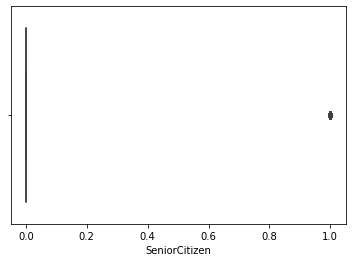

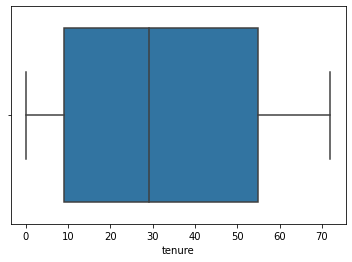

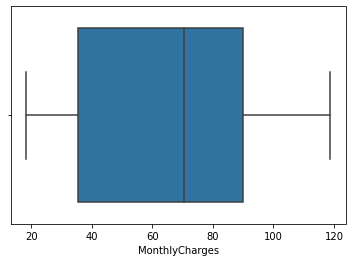

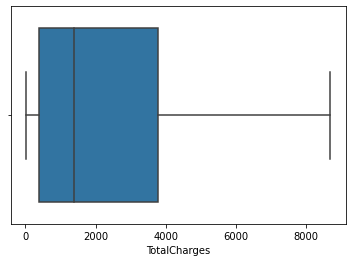

In [22]:
for i in num:
    sns.boxplot(df_4[i])
    plt.show()

In [23]:
df_4.duplicated().sum()

22

In [24]:
df_4.drop_duplicates(inplace=True)

In [25]:
df_4.duplicated().sum()

0

In [26]:
df_4.to_csv('Churn_csv')

In [27]:
churn = pd.read_csv('Churn_csv')

In [28]:
churn.drop(churn.filter(regex='Unnamed: 0'),axis=1,inplace=True)

In [29]:
churn

,DeviceProtection,OnlineBackup,Contract,OnlineSecurity,Dependents,gender,Churn,Partner,TechSupport,InternetService,StreamingMovies,PaperlessBilling,PhoneService,MultipleLines,PaymentMethod,StreamingTV,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,No,Yes,Month,No,No,Female,No,Yes,No,DSL,No,Yes,No,No phone service,Electronic check,No,0.0,1.0,29.85,29.85
1,Yes,No,One year,Yes,No,Male,No,No,No,DSL,No,No,Yes,No,Mailed check,No,0.0,34.0,56.95,1889.50
2,No,Yes,Month,Yes,No,Male,Yes,No,No,DSL,No,Yes,Yes,No,Mailed check,No,0.0,2.0,53.85,108.15
3,Yes,No,One year,Yes,No,Male,No,No,Yes,DSL,No,No,No,No phone service,Bank transfer (automatic),No,0.0,45.0,42.30,1840.75
4,No,No,Month,No,No,Female,Yes,No,No,Fiber optic,No,Yes,Yes,No,Electronic check,No,0.0,2.0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,Yes,No,One year,Yes,Yes,Male,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Mailed check,Yes,0.0,24.0,84.80,1990.50
7017,Yes,Yes,One year,No,Yes,Female,No,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Credit card (automatic),Yes,0.0,72.0,103.20,7362.90
7018,No,No,Month,Yes,Yes,Female,No,Yes,No,DSL,No,Yes,No,No phone service,Electronic check,No,0.0,11.0,29.60,346.45
7019,No,No,Month,No,No,Male,Yes,Yes,No,Fiber optic,No,Yes,Yes,Yes,Mailed check,No,1.0,4.0,74.40,306.60


In [30]:
y = churn['Churn']
X = churn.drop('Churn',axis=1)

In [31]:
X

,DeviceProtection,OnlineBackup,Contract,OnlineSecurity,Dependents,gender,Partner,TechSupport,InternetService,StreamingMovies,PaperlessBilling,PhoneService,MultipleLines,PaymentMethod,StreamingTV,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,No,Yes,Month,No,No,Female,Yes,No,DSL,No,Yes,No,No phone service,Electronic check,No,0.0,1.0,29.85,29.85
1,Yes,No,One year,Yes,No,Male,No,No,DSL,No,No,Yes,No,Mailed check,No,0.0,34.0,56.95,1889.50
2,No,Yes,Month,Yes,No,Male,No,No,DSL,No,Yes,Yes,No,Mailed check,No,0.0,2.0,53.85,108.15
3,Yes,No,One year,Yes,No,Male,No,Yes,DSL,No,No,No,No phone service,Bank transfer (automatic),No,0.0,45.0,42.30,1840.75
4,No,No,Month,No,No,Female,No,No,Fiber optic,No,Yes,Yes,No,Electronic check,No,0.0,2.0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,Yes,No,One year,Yes,Yes,Male,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Mailed check,Yes,0.0,24.0,84.80,1990.50
7017,Yes,Yes,One year,No,Yes,Female,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Credit card (automatic),Yes,0.0,72.0,103.20,7362.90
7018,No,No,Month,Yes,Yes,Female,Yes,No,DSL,No,Yes,No,No phone service,Electronic check,No,0.0,11.0,29.60,346.45
7019,No,No,Month,No,No,Male,Yes,No,Fiber optic,No,Yes,Yes,Yes,Mailed check,No,1.0,4.0,74.40,306.60


In [32]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7016     No
7017     No
7018     No
7019    Yes
7020     No
Name: Churn, Length: 7021, dtype: object

#### spit into train and test

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=42)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(5616, 19) (1405, 19)
(5616,) (1405,)


In [34]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5616 entries, 3269 to 860
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DeviceProtection  5616 non-null   object 
 1   OnlineBackup      5616 non-null   object 
 2   Contract          5616 non-null   object 
 3   OnlineSecurity    5616 non-null   object 
 4   Dependents        5616 non-null   object 
 5   gender            5616 non-null   object 
 6   Partner           5616 non-null   object 
 7   TechSupport       5616 non-null   object 
 8   InternetService   5616 non-null   object 
 9   StreamingMovies   5616 non-null   object 
 10  PaperlessBilling  5616 non-null   object 
 11  PhoneService      5616 non-null   object 
 12  MultipleLines     5616 non-null   object 
 13  PaymentMethod     5616 non-null   object 
 14  StreamingTV       5616 non-null   object 
 15  SeniorCitizen     5616 non-null   float64
 16  tenure            5616 non-null   float6

In [35]:
x_train_num = x_train.select_dtypes(include=['float64','int64'])
x_train_cat = x_train.select_dtypes(include=['object'])

In [36]:
x_train_num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3269,0.0,4.0,79.15,317.25
6252,1.0,33.0,83.85,2716.30
1323,0.0,4.0,20.35,76.35
5190,0.0,9.0,19.90,164.60
4071,0.0,29.0,26.10,692.55
...,...,...,...,...
3772,0.0,29.0,19.10,529.50
5191,0.0,59.0,111.10,6555.20
5226,0.0,26.0,54.75,1406.90
5390,0.0,31.0,20.45,638.55


#### apply Standardization on num features

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_num_trans = pd.DataFrame(sc.fit_transform(x_train_num),columns=x_train_num.columns,index=x_train_num.index)
x_train_num_trans.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3269,-0.443769,-1.162519,0.474849,-0.868189
6252,2.253425,0.026315,0.630667,0.191218


#### Apply One Hot Encoding on cat featurs : 

In [38]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first',sparse=False)
x_train_cat_trans = pd.DataFrame(ohe.fit_transform(x_train_cat),
                          columns=ohe.get_feature_names_out(x_train_cat.columns),
                         index=x_train_cat.index)

In [39]:
x_train_cat_trans.head()

,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,Contract_One year,Contract_Two year,OnlineSecurity_No internet service,OnlineSecurity_Yes,Dependents_Yes,gender_Male,...,StreamingMovies_Yes,PaperlessBilling_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingTV_No internet service,StreamingTV_Yes
3269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6252,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1323,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5190,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4071,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [40]:
x_train_transfor = pd.concat([x_train_cat_trans,x_train_num_trans],axis=1)
x_train_transfor.head()

,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,Contract_One year,Contract_Two year,OnlineSecurity_No internet service,OnlineSecurity_Yes,Dependents_Yes,gender_Male,...,MultipleLines_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingTV_No internet service,StreamingTV_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.443769,-1.162519,0.474849,-0.868189
6252,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,2.253425,0.026315,0.630667,0.191218
1323,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,-0.443769,-1.162519,-1.474544,-0.974569
5190,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-0.443769,-0.957548,-1.489463,-0.935599
4071,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,-0.443769,-0.137662,-1.283915,-0.702459


In [41]:
x_test_num = x_test.select_dtypes(include=['float64','int64'])
x_test_cat = x_test.select_dtypes(include=['object'])

In [42]:
x_test_num_trans = pd.DataFrame(sc.transform(x_test_num),
                                columns=x_test_num.columns,
                                index=x_test_num.index)
x_test_num_trans.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3909,-0.443769,-0.506611,0.841188,-0.223770
2462,-0.443769,0.682223,1.098124,1.163433
2879,2.253425,1.420120,1.699850,2.453750
3761,-0.443769,1.010177,-1.489463,-0.515642
3745,-0.443769,-1.285502,-1.182798,-0.995413


In [43]:
x_test_cat_trans = pd.DataFrame(ohe.transform(x_test_cat),
                                columns=ohe.get_feature_names_out(x_test_cat.columns),
                                index=x_test_cat.index)

In [44]:
x_test_cat_trans.head()

,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,Contract_One year,Contract_Two year,OnlineSecurity_No internet service,OnlineSecurity_Yes,Dependents_Yes,gender_Male,...,StreamingMovies_Yes,PaperlessBilling_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingTV_No internet service,StreamingTV_Yes
3909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2462,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2879,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3761,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
x_test_transfor = pd.concat([x_test_cat_trans,x_test_num_trans],axis=1)
x_test_transfor.head()

,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,Contract_One year,Contract_Two year,OnlineSecurity_No internet service,OnlineSecurity_Yes,Dependents_Yes,gender_Male,...,MultipleLines_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingTV_No internet service,StreamingTV_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-0.443769,-0.506611,0.841188,-0.223770
2462,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,-0.443769,0.682223,1.098124,1.163433
2879,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,2.253425,1.420120,1.699850,2.453750
3761,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.443769,1.010177,-1.489463,-0.515642
3745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.443769,-1.285502,-1.182798,-0.995413


In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train_transfor,y_train)

RandomForestClassifier()

In [47]:
preductions = rf_model.predict(x_test_transfor)
preductions

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [48]:
rf_model.feature_importances_

array([0.00677536, 0.01953475, 0.00423931, 0.02142549, 0.02188815,
       0.02730535, 0.00867993, 0.0261867 , 0.02000267, 0.02935694,
       0.0230564 , 0.00501909, 0.02449966, 0.03707902, 0.00767155,
       0.00171884, 0.01755328, 0.02652772, 0.00432912, 0.00400418,
       0.01988094, 0.0129199 , 0.04034929, 0.01255289, 0.0067388 ,
       0.01663836, 0.02099935, 0.17328143, 0.16619593, 0.1935896 ])

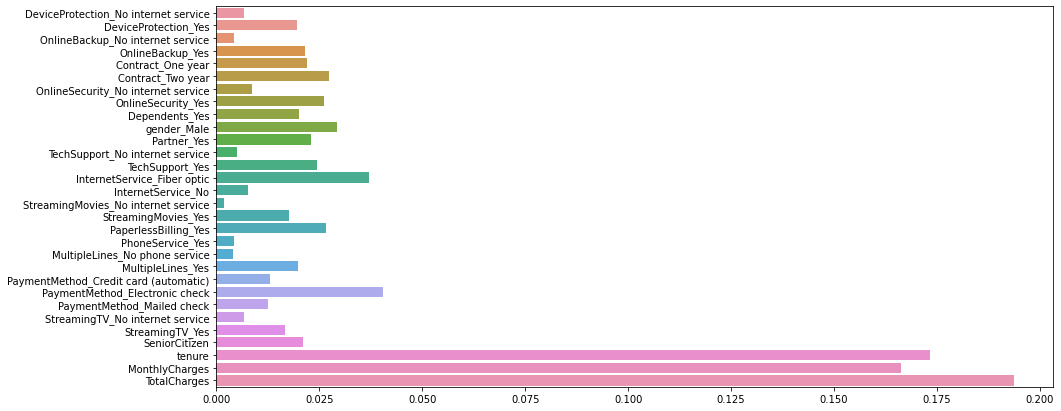

In [49]:
plt.figure(figsize=(15,7))
sns.barplot(x=rf_model.feature_importances_,y=x_train_transfor.columns)
plt.show()

In [50]:
from sklearn import metrics
y_test_pred= metrics.accuracy_score(y_test,preductions)
y_test_pred

0.7879003558718861

### LogisticReggresion

In [51]:
algorithm=[]
accure_score=[]
f1_score=[]
precision_score=[]

from sklearn.linear_model import LogisticRegression
logist = LogisticRegression(C=0.01,solver='liblinear')

logist.fit(x_train_transfor,y_train)
# predict
y_test_pred = logist.predict(x_test_transfor)

algorithm.append('Logistregression')

accure_score.append(metrics.accuracy_score(y_test,y_test_pred))

precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))

f1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))

In [52]:
print('used algorithm is  : ',(algorithm))
print('accuresy_score     : ',accure_score)
print('precision_score    : ',(precision_score))
print('f1_score           : ',f1_score)

used algorithm is  :  ['Logistregression']
accuresy_score     :  [0.801423487544484]
precision_score    :  [0.8505434782608695]
f1_score           :  [0.870653685674548]


In [53]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.metrics import classification_report

In [54]:
tuned_param = [{'penalty' : ['l1','l2']},
              {'C':[0.001,0.01,0.1,10,100]}]
clf = GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
                  param_grid=tuned_param,
                  scoring='accuracy',
                  return_train_score=True,
                  cv=5,
                   verbose=1)
clf.fit(x_train_transfor,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']},
                         {'C': [0.001, 0.01, 0.1, 10, 100]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [55]:
clf.best_params_
clf.best_estimator_

LogisticRegression(C=100, solver='liblinear')

In [56]:
print(clf.best_params_)
print(clf.best_estimator_)
print(clf.score(x_train_transfor,y_train))

{'C': 100}
LogisticRegression(C=100, solver='liblinear')
0.8096509971509972


In [57]:
df=pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,param_C,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.496440,0.194985,0.007893,0.006990,l1,NaN,{'penalty': 'l1'},0.819395,0.799644,0.803206,...,0.805909,0.006914,4,0.805209,0.809036,0.810817,0.809259,0.807256,0.808315,0.001920
1,0.063084,0.008376,0.012757,0.002536,l2,NaN,{'penalty': 'l2'},0.820285,0.800534,0.802315,...,0.806621,0.007037,3,0.806545,0.808591,0.809927,0.809036,0.807701,0.808360,0.001157
2,0.037722,0.007211,0.012275,0.006153,NaN,0.001,{'C': 0.001},0.785587,0.792520,0.788958,...,0.785256,0.005474,7,0.784951,0.786557,0.784999,0.789005,0.785889,0.786280,0.001487
3,0.043410,0.006135,0.006250,0.007655,NaN,0.01,{'C': 0.01},0.806050,0.797863,0.800534,...,0.802172,0.003572,6,0.801647,0.803472,0.800801,0.800134,0.799466,0.801104,0.001387
4,0.049465,0.004343,0.006530,0.006331,NaN,0.1,{'C': 0.1},0.816726,0.800534,0.801425,...,0.804485,0.006198,5,0.804541,0.808814,0.807478,0.807478,0.806811,0.807024,0.001402
5,0.063976,0.011558,0.009675,0.006536,NaN,10,{'C': 10},0.822064,0.804987,0.799644,...,0.806799,0.007845,2,0.806990,0.806811,0.810594,0.808369,0.808369,0.808226,0.001355
6,0.077709,0.010104,0.009373,0.005477,NaN,100,{'C': 100},0.822064,0.808549,0.796972,...,0.807155,0.008345,1,0.806768,0.806588,0.810149,0.807701,0.808591,0.807959,0.001309


In [58]:
df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_penalty', 'param_C', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [59]:
df[df['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,param_C,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
6,0.077709,0.010104,0.009373,0.005477,NaN,100,{'C': 100},0.822064,0.808549,0.796972,...,0.807155,0.008345,1,0.806768,0.806588,0.810149,0.807701,0.808591,0.807959,0.001309


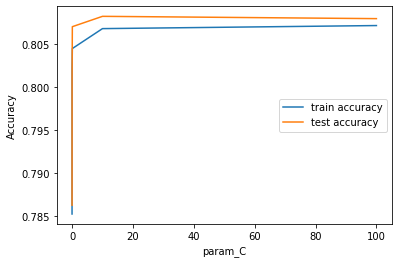

In [60]:
plt.plot(df['param_C'],df['mean_test_score'])
plt.plot(df['param_C'],df['mean_train_score'])

plt.xlabel('param_C')
plt.ylabel('Accuracy')

plt.legend(['train accuracy','test accuracy'],loc='right')
plt.show()

### DecissionTree

In [61]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=5)

tree.fit(x_train_transfor,y_train)

y_test_pred=tree.predict(x_test_transfor)

algorithm.append('DecissionTreeClassifier')

from sklearn import metrics
accure_score.append(metrics.accuracy_score(y_test,y_test_pred))
f1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))
precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))

In [62]:
tuned_parametrs=[{'max_depth':[i for i in range(1,50)]}]

cls_1=GridSearchCV(estimator=DecisionTreeClassifier(),
                  param_grid=tuned_parametrs,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True,
                  verbose=1)

cls_1.fit(x_train_transfor,y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [63]:
print(cls_1.best_params_)
print(cls_1.best_estimator_)
print(cls_1.score(x_train_transfor,y_train))

{'max_depth': 5}
DecisionTreeClassifier(max_depth=5)
0.7995014245014245


In [64]:
df=pd.DataFrame(cls_1.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.029347,0.006994,0.012706,0.006368,1,{'max_depth': 1},0.732206,0.731968,0.731968,0.731968,...,0.732016,0.000095,18,0.731968,0.732028,0.732028,0.732028,0.732028,0.732016,0.000024
1,0.032885,0.009513,0.009650,0.006137,2,{'max_depth': 2},0.782918,0.788958,0.790739,0.780944,...,0.784901,0.004142,2,0.784728,0.789673,0.788783,0.791676,0.785221,0.788016,0.002659
2,0.034792,0.016086,0.009854,0.008880,3,{'max_depth': 3},0.782918,0.788958,0.790739,0.780944,...,0.784901,0.004142,2,0.784728,0.789673,0.788783,0.791676,0.785221,0.788016,0.002659
3,0.048751,0.009886,0.004956,0.006406,4,{'max_depth': 4},0.779359,0.785396,0.783615,0.778272,...,0.780093,0.004092,6,0.789403,0.798798,0.790786,0.792789,0.789005,0.792156,0.003575
4,0.055083,0.006624,0.015537,0.009726,5,{'max_depth': 5},0.790036,0.788958,0.804096,0.776492,...,0.789530,0.008774,1,0.801425,0.802582,0.806365,0.802359,0.802137,0.802974,0.001740
5,0.065941,0.018848,0.013354,0.006879,6,{'max_depth': 6},0.787367,0.784506,0.788958,0.768477,...,0.783475,0.007646,4,0.813001,0.806588,0.818162,0.807256,0.811262,0.811254,0.004208
6,0.072140,0.018354,0.006249,0.007653,7,{'max_depth': 7},0.789146,0.773820,0.782725,0.766696,...,0.782762,0.012059,5,0.829252,0.827955,0.826174,0.822390,0.823726,0.825899,0.002553
7,0.078525,0.015894,0.009587,0.008741,8,{'max_depth': 8},0.784698,0.772039,0.759573,0.743544,...,0.769584,0.016458,7,0.839047,0.845092,0.846205,0.840864,0.841976,0.842637,0.002654
8,0.089602,0.016387,0.011249,0.006990,9,{'max_depth': 9},0.758007,0.757792,0.758682,0.745325,...,0.761040,0.013157,8,0.858638,0.865124,0.864901,0.863788,0.860450,0.862580,0.002584
9,0.103859,0.022960,0.007751,0.006987,10,{'max_depth': 10},0.748221,0.757792,0.746215,0.747996,...,0.758549,0.017463,9,0.881345,0.888048,0.887380,0.884710,0.879590,0.884215,0.003304


In [65]:
df[df['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,0.055083,0.006624,0.015537,0.009726,5,{'max_depth': 5},0.790036,0.788958,0.804096,0.776492,...,0.78953,0.008774,1,0.801425,0.802582,0.806365,0.802359,0.802137,0.802974,0.00174


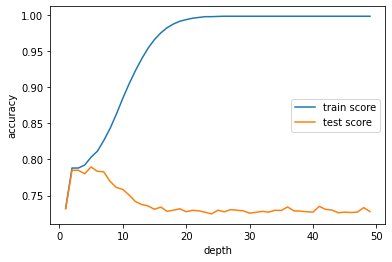

In [66]:
plt.plot(df['param_max_depth'],df['mean_train_score'])
plt.plot(df['param_max_depth'],df['mean_test_score'])

plt.xlabel('depth')
plt.ylabel('accuracy')
plt.legend(['train score','test score'],loc='right')
plt.show()

### KNeighborsClassifier

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=3)

knn.fit(x_train_transfor,y_train)

y_test_pred = knn.predict(x_test_transfor)

algorithm.append("KNeighborsClassifier")

accure_score.append(metrics.accuracy_score(y_test,y_test_pred))

f1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))

precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))


### SVM

In [68]:
from sklearn.svm import SVC
svc = SVC(C=10)

svc.fit(x_train_transfor,y_train)

y_test_pred = svc.predict(x_test_transfor)

algorithm.append("Support Vectos Classifier")

accure_score.append(metrics.accuracy_score(y_test,y_test_pred))

f1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))

precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))


In [69]:
#tuned_param =[{'kernel':['rbf'],'gamma': np.random.rand(3),'C':[1,10,100,1000]},
              #{'kernel':['linear'],'C':[1,10,100,1000]}]

#cls_2 = GridSearchCV(estimator=SVC(),
                    #param_grid=tuned_param,
                    #scoring='accuracy',
                     #cv=5,
                     #return_train_score=True,
                     #verbose=1)
#cls_2.fit(x_train_transfor,y_train)

### RandomForest

In [70]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(x_train_transfor,y_train)

y_test_pred = rfc.predict(x_test_transfor)

algorithm.append("RandomForestClassifier")

accure_score.append(metrics.accuracy_score(y_test,y_test_pred))

f1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))

precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))

###  AdaBoostClassifier

In [71]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

ada.fit(x_train_transfor,y_train)

y_test_pred = ada.predict(x_test_transfor)

algorithm.append("AdaBoostClassifier")

accure_score.append(metrics.accuracy_score(y_test,y_test_pred))

f1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))

precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))

### GradientBoostingClassifier

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

gbc.fit(x_train_transfor,y_train)

y_test_pred = gbc.predict(x_test_transfor)

algorithm.append("GradientBoostingClassifier")

accure_score.append(metrics.accuracy_score(y_test,y_test_pred))

f1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))

precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))

### BernoulliNB

In [73]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()

bnb.fit(x_train_transfor,y_train)

y_test_pred = bnb.predict(x_test_transfor)

algorithm.append("Naive bayes Algorithem")

accure_score.append(metrics.accuracy_score(y_test,y_test_pred))

f1_score.append(metrics.f1_score(y_test,y_test_pred,pos_label='No'))

precision_score.append(metrics.precision_score(y_test,y_test_pred,pos_label='No'))

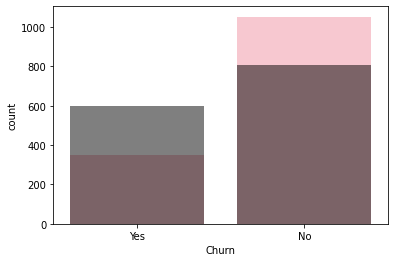

In [74]:
sns.countplot(x=y_test,alpha=1.0,color='pink')
sns.countplot(x=y_test_pred,alpha=0.5,color='black')
plt.show()

In [75]:
overview=pd.DataFrame({'Accuracy_score':accure_score,'Precision_score':precision_score,'F1_score':f1_score},index=algorithm)
overview

,Accuracy_score,Precision_score,F1_score
Logistregression,0.801423,0.850543,0.870654
DecissionTreeClassifier,0.787900,0.832599,0.863803
KNeighborsClassifier,0.757295,0.841651,0.837232
Support Vectos Classifier,0.784342,0.846580,0.858080
RandomForestClassifier,0.782918,0.833333,0.859770
AdaBoostClassifier,0.806406,0.854034,0.873840
GradientBoostingClassifier,0.802135,0.845674,0.872125
Naive bayes Algorithem,0.718149,0.908075,0.786868


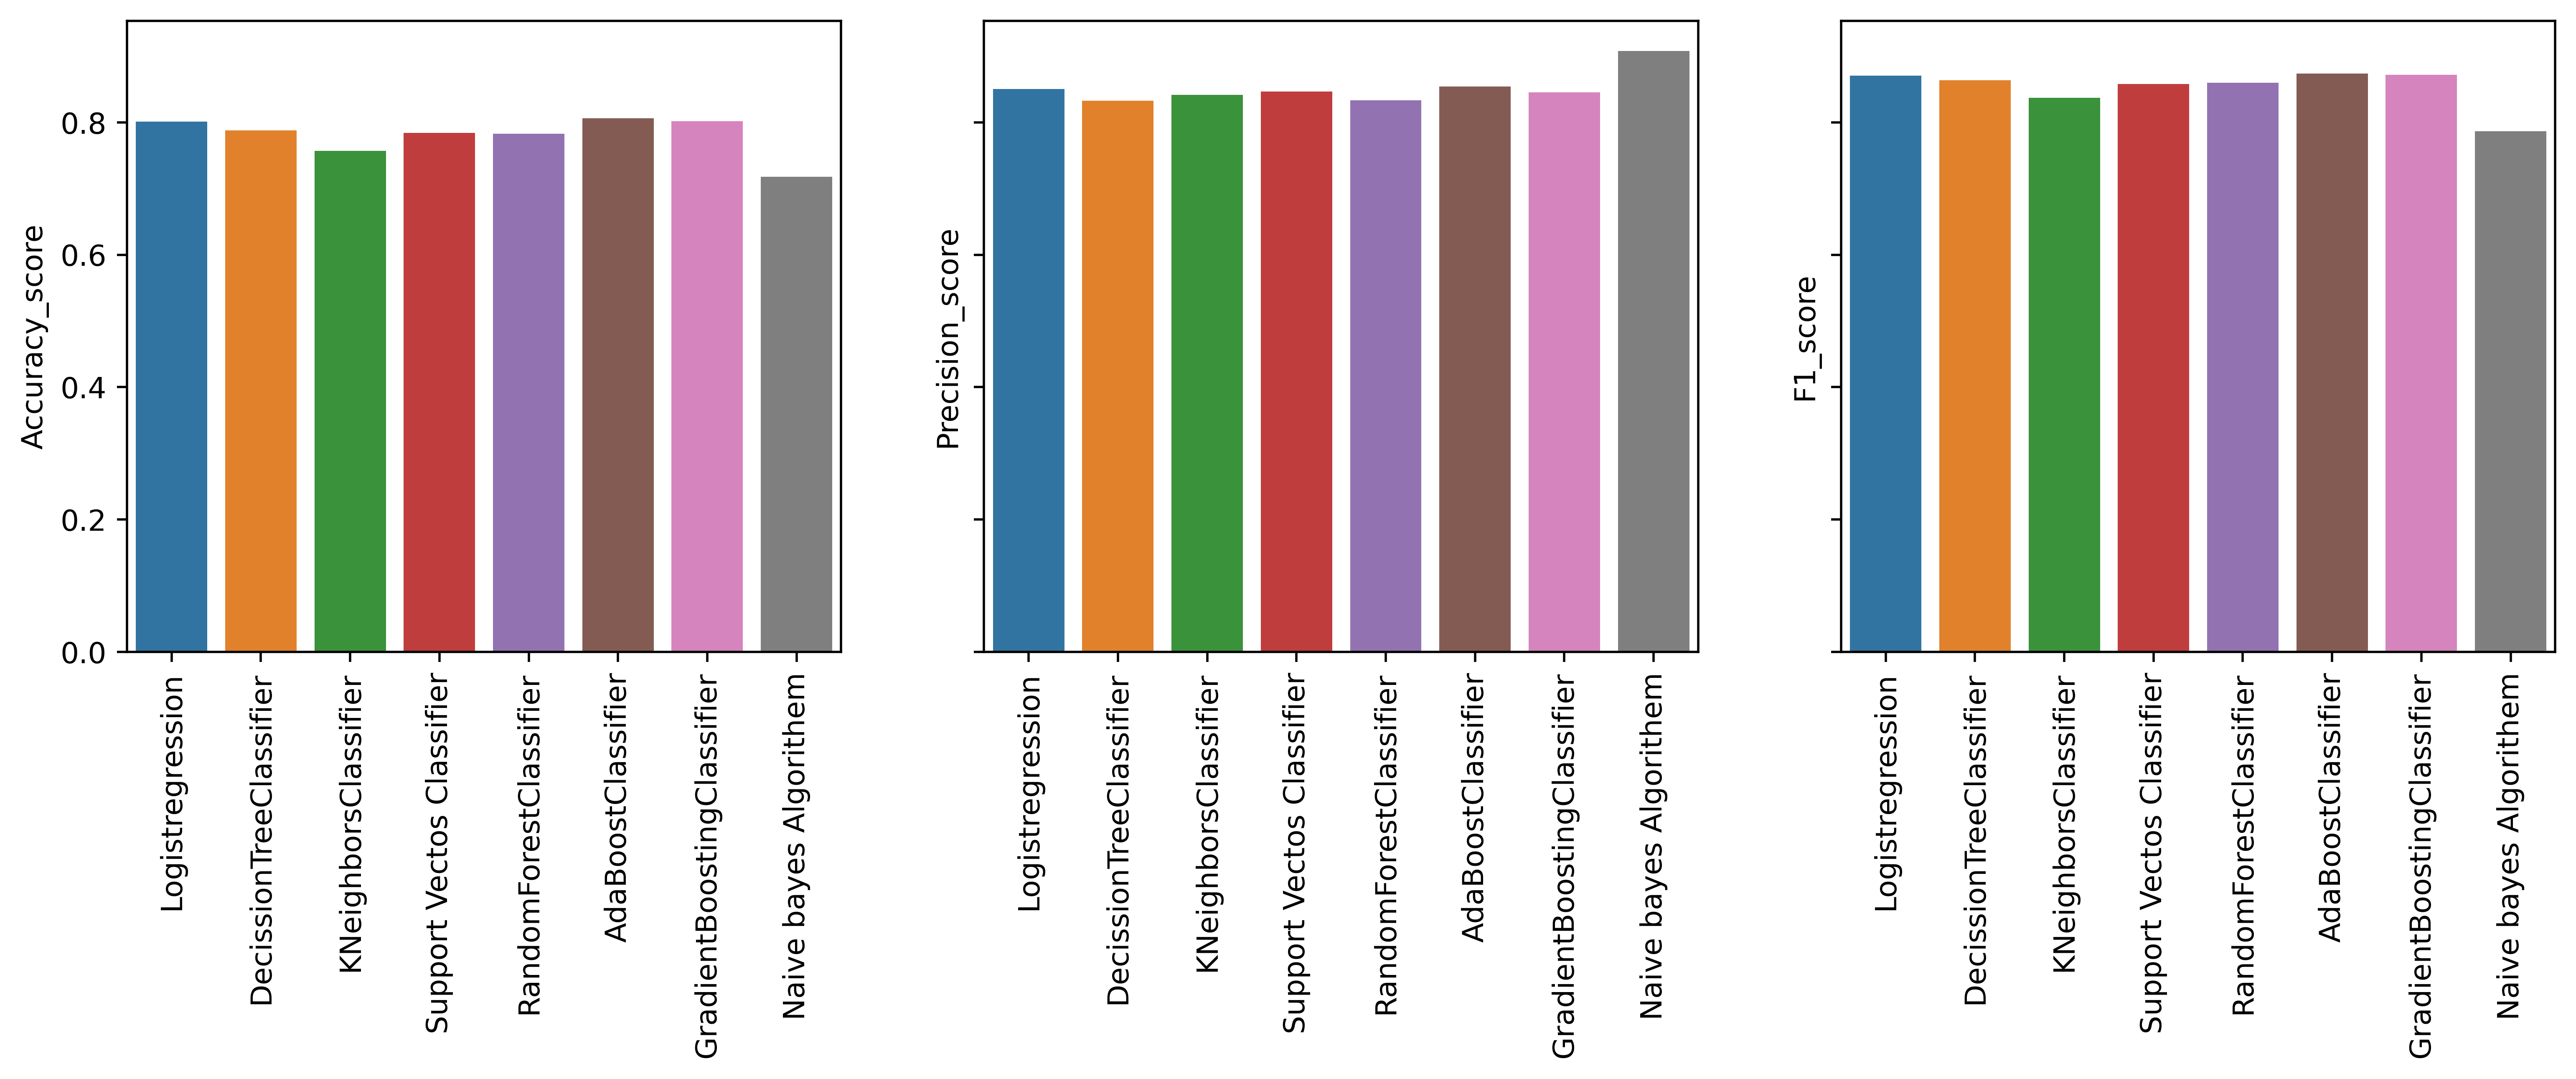

In [76]:
fig, axes = plt.subplots(1,3, figsize = (15,4),dpi=500,sharey=True)
a=overview.index
sns.barplot(y=overview.Accuracy_score,x=a,ax=axes[0])
sns.barplot(y=overview.Precision_score,x=a,ax=axes[1])
sns.barplot(y=overview.F1_score,x=a,ax=axes[2])
plt.sca(axes[0])
plt.xticks(rotation=90)
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.sca(axes[2])
plt.xticks(rotation=90)
plt.show()

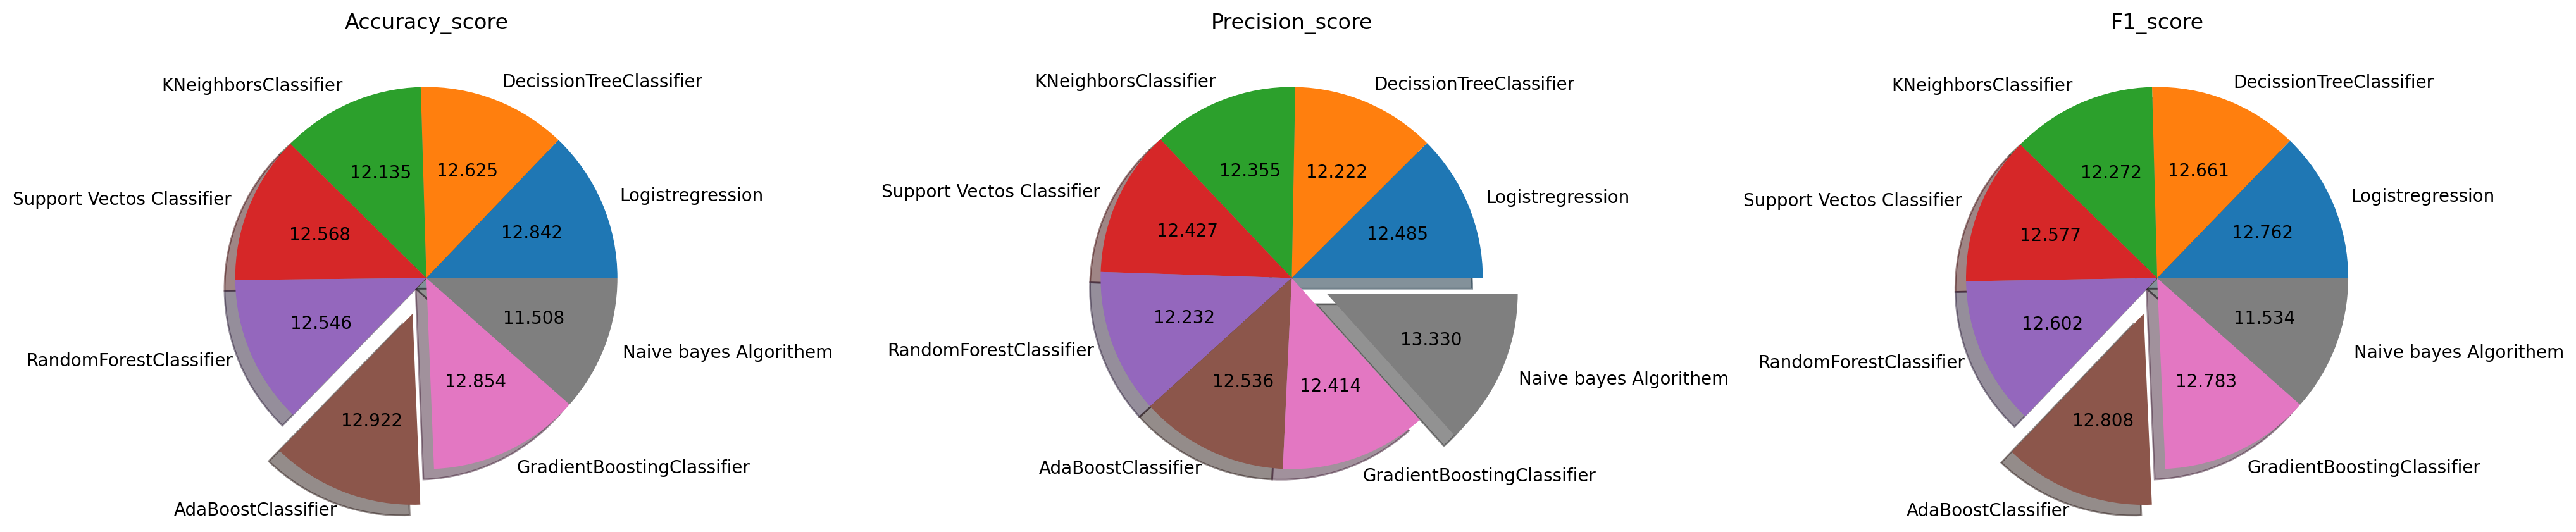

In [77]:
fig,axes=plt.subplots(1,3,figsize=(25,5),dpi=200)
overview['Accuracy_score'].plot(ax=axes[0],kind='pie',explode=[0,0,0,0,0,0.2,0,0],ylabel=' ',xlabel=None,autopct='%.3f',shadow=True)
axes[0].title.set_text('Accuracy_score')

overview['Precision_score'].plot(ax=axes[1],kind='pie',explode=[0,0,0,0,0,0,0,0.2],ylabel=' ',xlabel=None,autopct='%.3f',shadow=True)
axes[1].title.set_text('Precision_score')

overview['F1_score'].plot(ax=axes[2],kind='pie',explode=[0,0,0,0,0,0.2,0,0],ylabel=' ',xlabel=None,autopct='%.3f',shadow=True)
axes[2].title.set_text('F1_score')

## Conclusion :

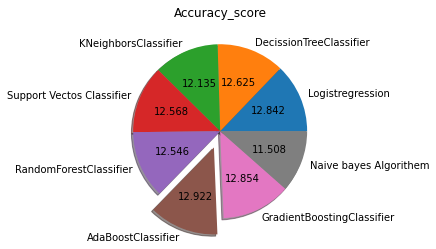

In [78]:
fig,axes=plt.figsize=(30,5)

overview['Accuracy_score'].plot(kind='pie',explode=[0,0,0,0,0,0.2,0,0],ylabel=' ',xlabel=None,autopct='%.3f',shadow=True)
plt.title('Accuracy_score')
plt.show()

### By looking at  Accuracy_Score metric
* AdaBoostClassifier as well as GradiantBoostingClassifier algorithms performing well  for Churn preduction on data
* They both showing high accuracy score compare to remaining algorithms

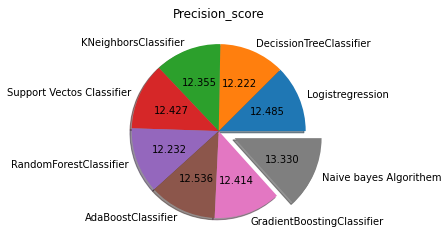

In [79]:
fig,axes=plt.figsize=(30,5)

overview['Precision_score'].plot(kind='pie',explode=[0,0,0,0,0,0,0,0.2],ylabel=' ',xlabel=None,autopct='%.3f',shadow=True)
plt.title('Precision_score')
plt.show()

### By looking at Precision_Score metric
* I must observed that Naive bayes algorithm giving high Precision score on Churn prediction
* we can find that Naive bayes algorithm score is high compare to remaining algorithms

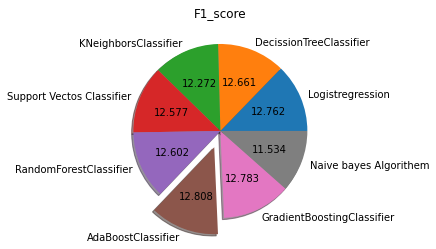

In [80]:
fig,axes=plt.figsize=(30,5)

overview['F1_score'].plot(kind='pie',explode=[0,0,0,0,0,0.2,0,0],ylabel=' ',xlabel=None,autopct='%.3f',shadow=True)
plt.title('F1_score')
plt.show()

### By looking at F1_Score metric
* AdaBoostClassifier algorithm performing well  for Churn preduction on data


## Exploratory Data Analysis
#### Univariate Anlysis

In [81]:
churn=pd.read_csv("Churn_csv")
churn.drop(churn.filter(regex="Unnamed"),axis=1, inplace=True)
churn

,DeviceProtection,OnlineBackup,Contract,OnlineSecurity,Dependents,gender,Churn,Partner,TechSupport,InternetService,StreamingMovies,PaperlessBilling,PhoneService,MultipleLines,PaymentMethod,StreamingTV,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,No,Yes,Month,No,No,Female,No,Yes,No,DSL,No,Yes,No,No phone service,Electronic check,No,0.0,1.0,29.85,29.85
1,Yes,No,One year,Yes,No,Male,No,No,No,DSL,No,No,Yes,No,Mailed check,No,0.0,34.0,56.95,1889.50
2,No,Yes,Month,Yes,No,Male,Yes,No,No,DSL,No,Yes,Yes,No,Mailed check,No,0.0,2.0,53.85,108.15
3,Yes,No,One year,Yes,No,Male,No,No,Yes,DSL,No,No,No,No phone service,Bank transfer (automatic),No,0.0,45.0,42.30,1840.75
4,No,No,Month,No,No,Female,Yes,No,No,Fiber optic,No,Yes,Yes,No,Electronic check,No,0.0,2.0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,Yes,No,One year,Yes,Yes,Male,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Mailed check,Yes,0.0,24.0,84.80,1990.50
7017,Yes,Yes,One year,No,Yes,Female,No,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Credit card (automatic),Yes,0.0,72.0,103.20,7362.90
7018,No,No,Month,Yes,Yes,Female,No,Yes,No,DSL,No,Yes,No,No phone service,Electronic check,No,0.0,11.0,29.60,346.45
7019,No,No,Month,No,No,Male,Yes,Yes,No,Fiber optic,No,Yes,Yes,Yes,Mailed check,No,1.0,4.0,74.40,306.60


In [82]:
num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,1.0,29.85,29.85
1,0.0,34.0,56.95,1889.50
2,0.0,2.0,53.85,108.15
3,0.0,45.0,42.30,1840.75
4,0.0,2.0,70.70,151.65
...,...,...,...,...
7038,0.0,24.0,84.80,1990.50
7039,0.0,72.0,103.20,7362.90
7040,0.0,11.0,29.60,346.45
7041,1.0,4.0,74.40,306.60


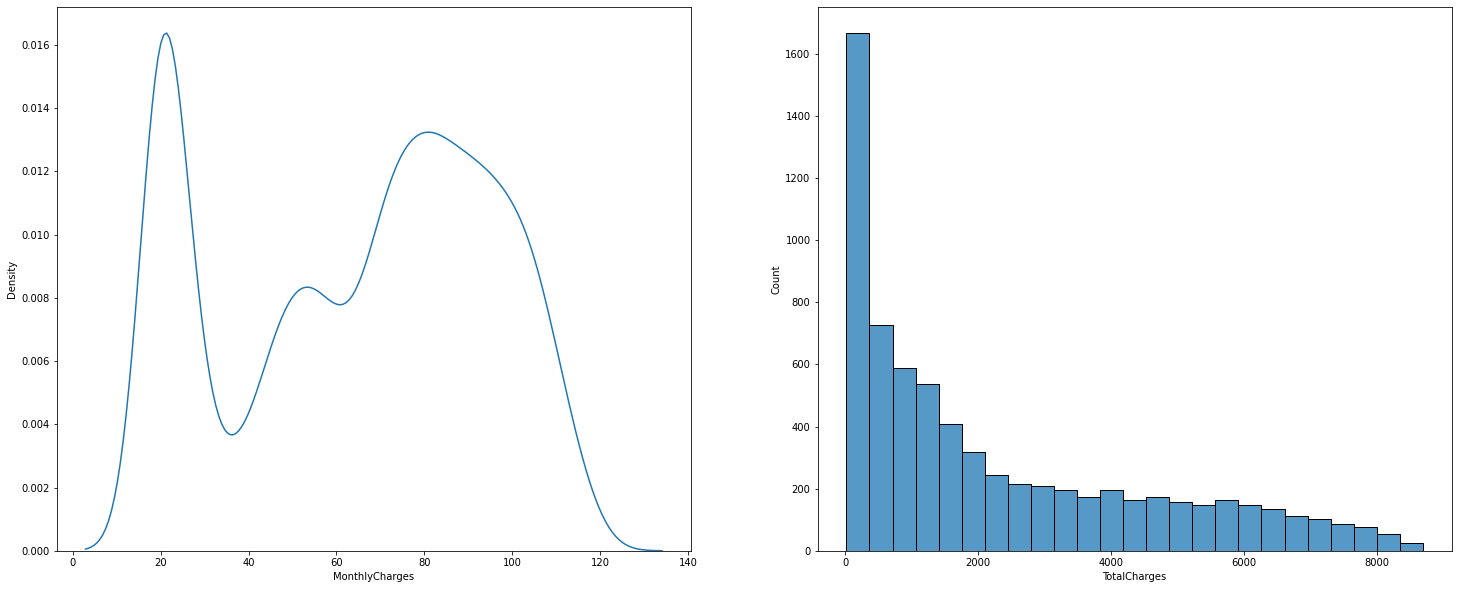

In [83]:
fig,axes=plt.subplots(1,2,figsize=(25,10))
sns.kdeplot(x=churn['MonthlyCharges'],data=churn,ax=axes[0])
sns.histplot(x=churn['TotalCharges'],data=churn,ax=axes[1])
plt.show()

#### Observations:
* The Monthly charges have most density in the range 40-120
* The Total charges of maximum count lies between 0-2000

In [84]:
cat

,DeviceProtection,OnlineBackup,Contract,OnlineSecurity,Dependents,gender,Churn,Partner,TechSupport,InternetService,StreamingMovies,PaperlessBilling,PhoneService,MultipleLines,PaymentMethod,StreamingTV
0,No,Yes,Month,No,No,Female,No,Yes,No,DSL,No,Yes,No,No phone service,Electronic check,No
1,Yes,No,One year,Yes,No,Male,No,No,No,DSL,No,No,Yes,No,Mailed check,No
2,No,Yes,Month,Yes,No,Male,Yes,No,No,DSL,No,Yes,Yes,No,Mailed check,No
3,Yes,No,One year,Yes,No,Male,No,No,Yes,DSL,No,No,No,No phone service,Bank transfer (automatic),No
4,No,No,Month,No,No,Female,Yes,No,No,Fiber optic,No,Yes,Yes,No,Electronic check,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,No,One year,Yes,Yes,Male,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Mailed check,Yes
7039,Yes,Yes,One year,No,Yes,Female,No,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Credit card (automatic),Yes
7040,No,No,Month,Yes,Yes,Female,No,Yes,No,DSL,No,Yes,No,No phone service,Electronic check,No
7041,No,No,Month,No,No,Male,Yes,Yes,No,Fiber optic,No,Yes,Yes,Yes,Mailed check,No


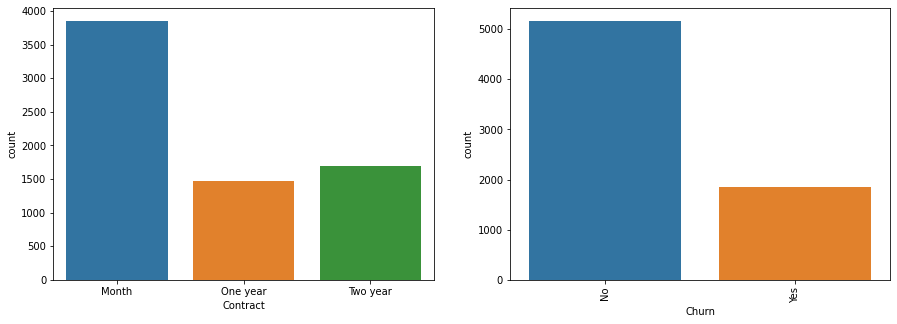

In [85]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=churn['Contract'],data=churn,ax=axes[0])
#plt.sca(axes[0])
plt.xticks(rotation=90)
sns.countplot(x=churn['Churn'],data=churn,ax=axes[1])
#plt.sca(axes[1])
plt.xticks(rotation=90)
plt.show()

#### Observations : 
* Most of are taken monthly cotract, and they do not want to retain in that.
* Churn score is also less.

In [86]:
import matplotlib.pyplot as plt

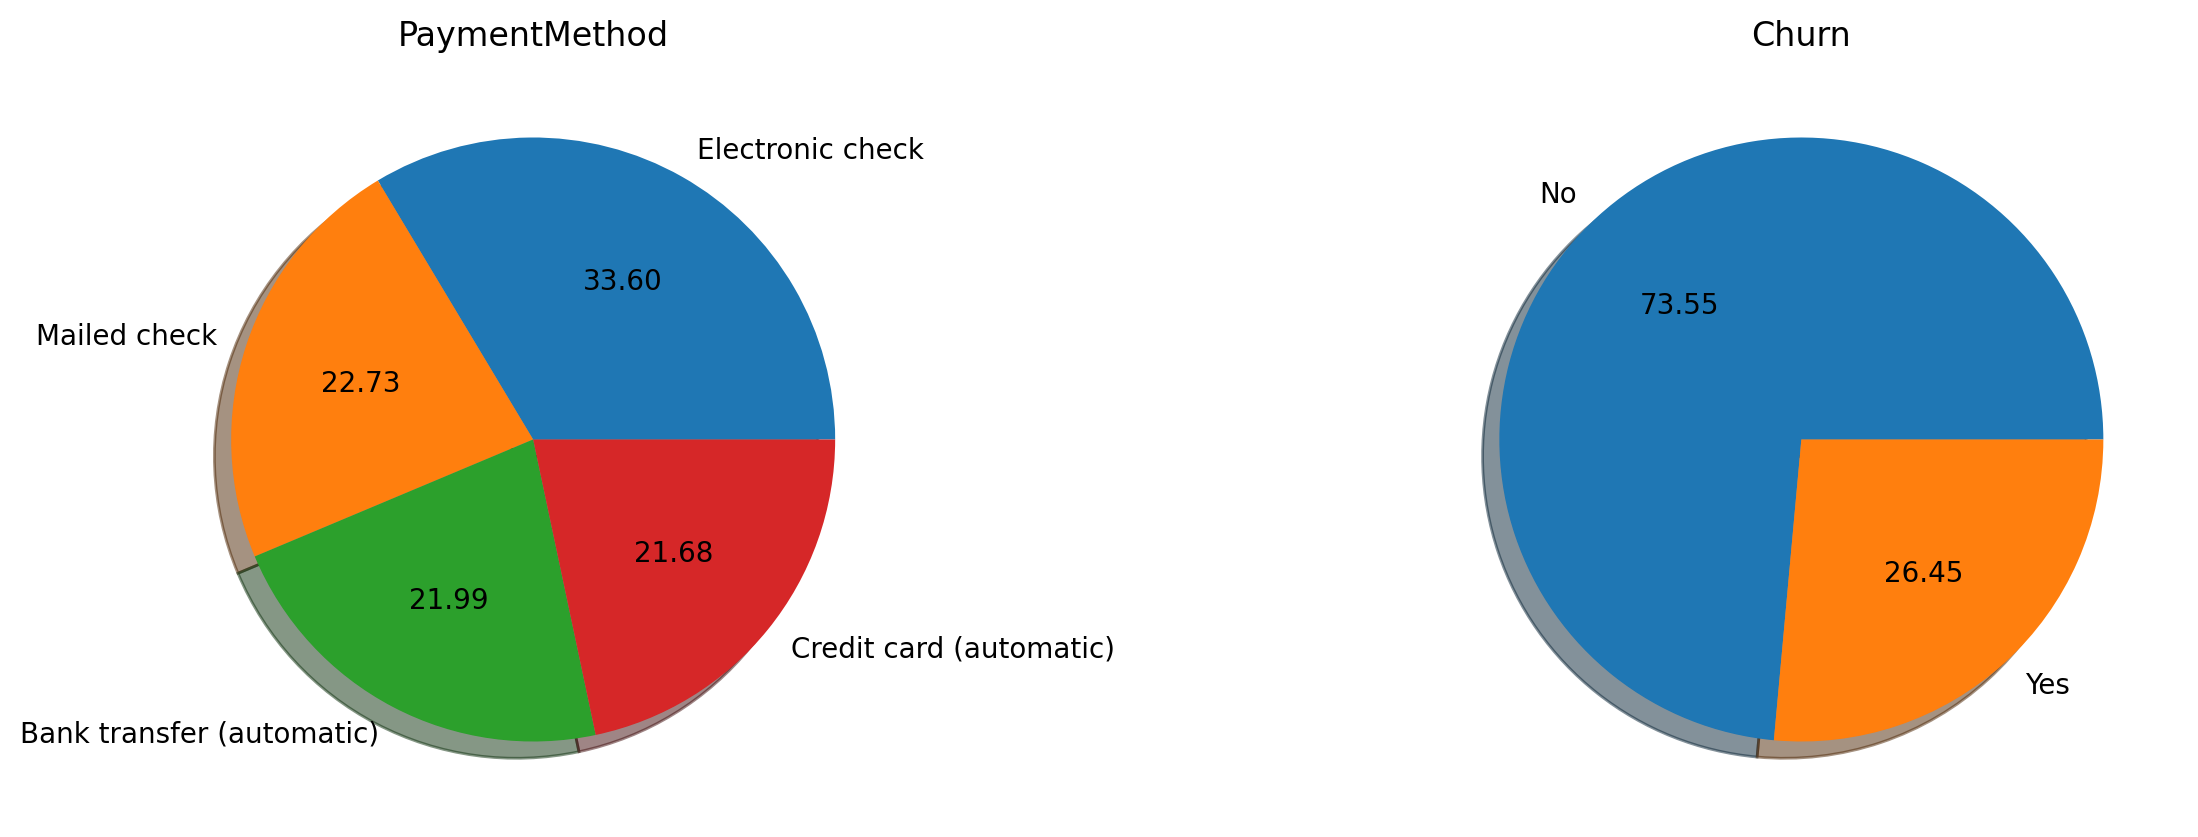

In [87]:
fig,axes=plt.subplots(1,2,figsize=(15,5),dpi=200)
churn['PaymentMethod'].value_counts().plot(kind='pie',ylabel=' ',ax=axes[0],autopct='%.2f',shadow=True)
axes[0].title.set_text('PaymentMethod')

churn['Churn'].value_counts().plot(kind='pie',ylabel=' ',ax=axes[1],autopct='%.2f',shadow=True)
axes[1].title.set_text('Churn')

#### Observation : 
* Most of customers are doing their payment in Electronic check method
* Customers churn is low.

#### Bi-Variate analysis

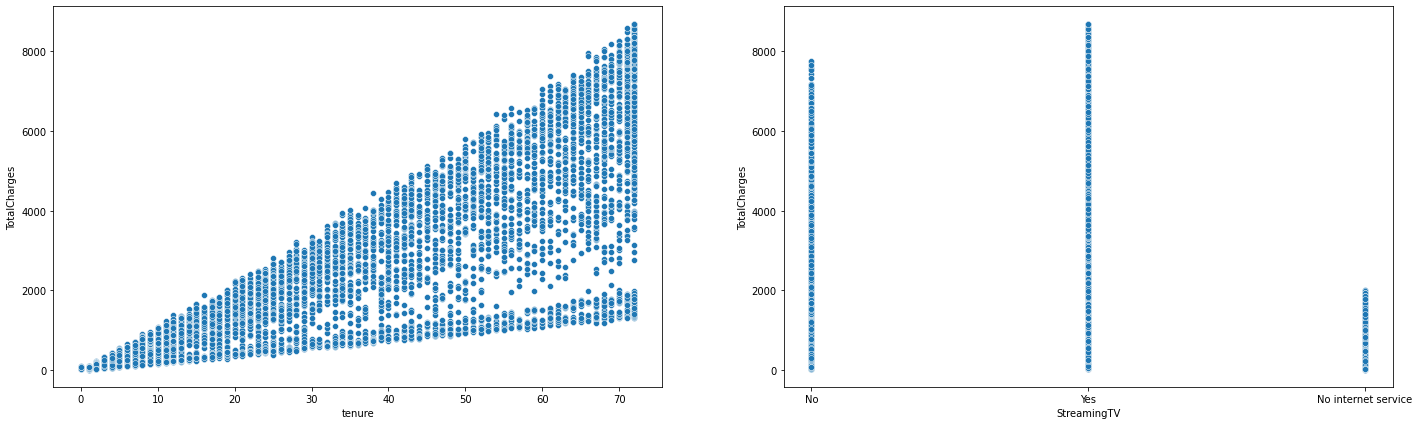

In [89]:
fig,axes=plt.subplots(1,2,figsize=(24,7))
sns.scatterplot(x=churn['tenure'],y=churn['TotalCharges'],data=churn,ax=axes[0])
sns.scatterplot(x=churn['StreamingTV'],y=churn['TotalCharges'],data=churn,ax=axes[1])
plt.show()

#### Observations : 
* This plot showing that tenure is increase then their Total charges are increases.
* It is showing linear relation ship. 
* Customers,if they watch or don't watch TV,Total charges will be increase.They are showing equalent     score
* If they do'nt have internet service,their will no such increment in Total charges.

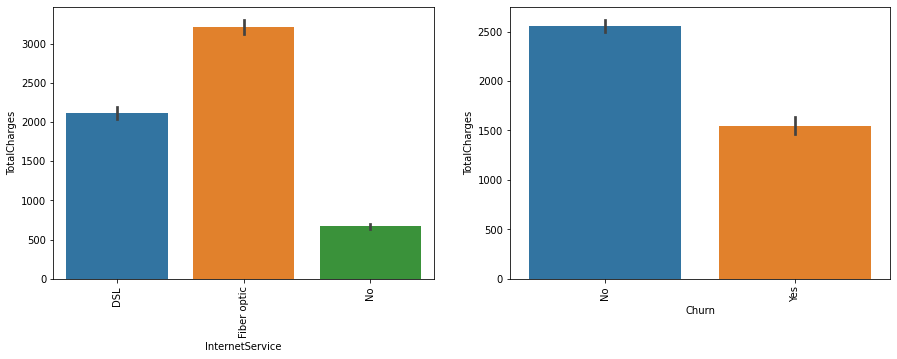

In [90]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=churn['InternetService'],y=churn['TotalCharges'],data=churn,ax=axes[0])
sns.barplot(x=churn['Churn'],y=churn['TotalCharges'],data=churn)
plt.sca(axes[0])
plt.xticks(rotation=90)
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.show()

#### Observations : 
* Lot of customers are choosing their internet services Fiber optic over the DSL
* Total charges are impacting to increase the customers churning rate.

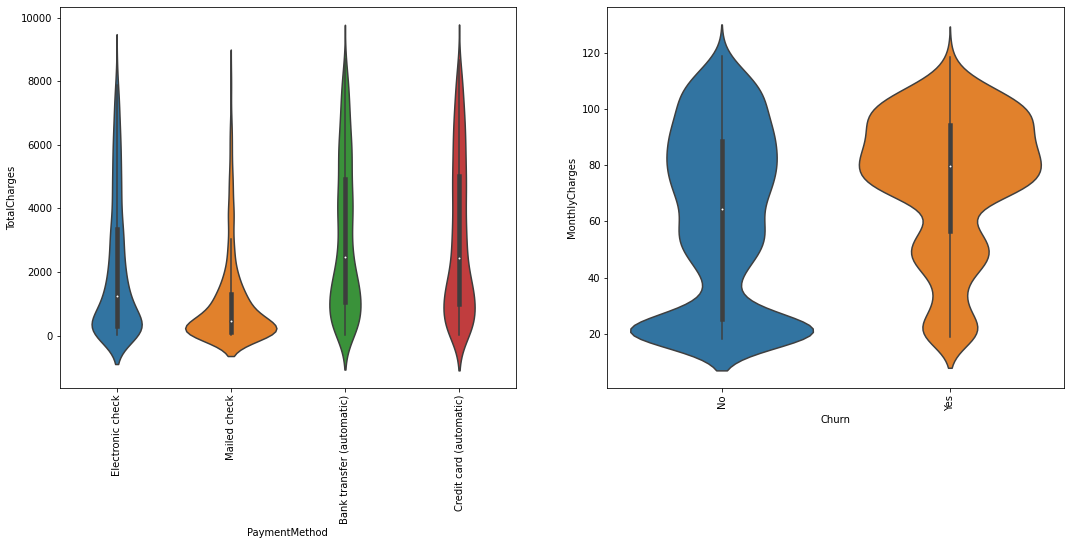

In [91]:
fig,axes=plt.subplots(1,2,figsize=(18,7))
sns.violinplot(x=churn['PaymentMethod'],y=churn['TotalCharges'],data=churn,ax=axes[0])
sns.violinplot(x=churn['Churn'],y=churn['MonthlyCharges'],data=churn)
plt.sca(axes[0])
plt.xticks(rotation=90)
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


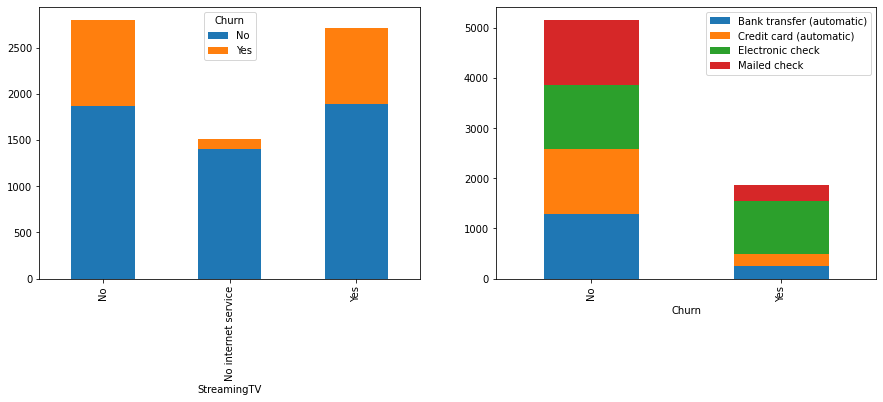

In [92]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
crosstab=pd.crosstab(churn['StreamingTV'],churn['Churn'])
crosstab.plot(kind='bar',stacked=True,ax=axes[0])
plt.legend(bbox_to_anchor=(1,1))
crosstab=pd.crosstab(churn['Churn'],churn['PaymentMethod'])
crosstab.plot(kind='bar',stacked=True,ax=axes[1])
plt.legend(bbox_to_anchor=(1,1))
plt.sca(axes[0])
plt.xticks(rotation=90)
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.show()

#### Observations :
* Customers who have the NO-internet services,their will no customers churn.
* Internet services is one of the imp features to ccustomers churn or not churn.
* Pyment method is showing some churning rate.

#### Multivariate Analysis

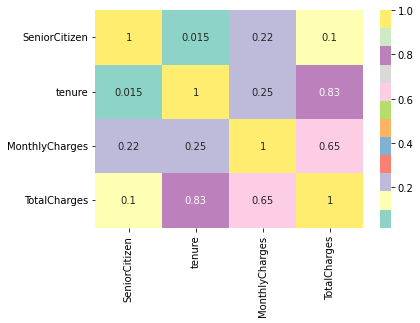

In [93]:
sns.heatmap(churn.corr(),annot=True,cmap='Set3')
plt.show()

#### Observation : 
* tenure and Total charges has mostly positive correlation in otherend SeniorCitizen and tenure has very low positive correlation.

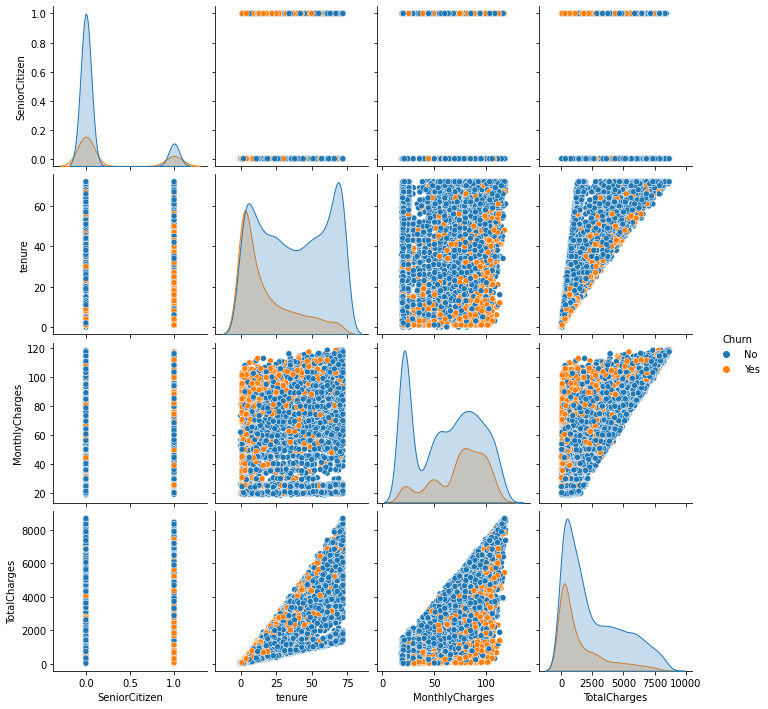

In [94]:
sns.pairplot(data=churn,hue='Churn')
plt.show()